In [2]:
import pandas
df = pandas.read_csv('../data/Gaia-SDSS.csv')
xs = df.GalRecX
ys = df.GalRecY
zs = df.GalRecZ

In [3]:
from numpy import *
import matplotlib.cm as cm
from PlotFuncs import *

# Galpy
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from mpl_toolkits.mplot3d import Axes3D
from astropy import units
from skimage import measure

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib import animation, rc



# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


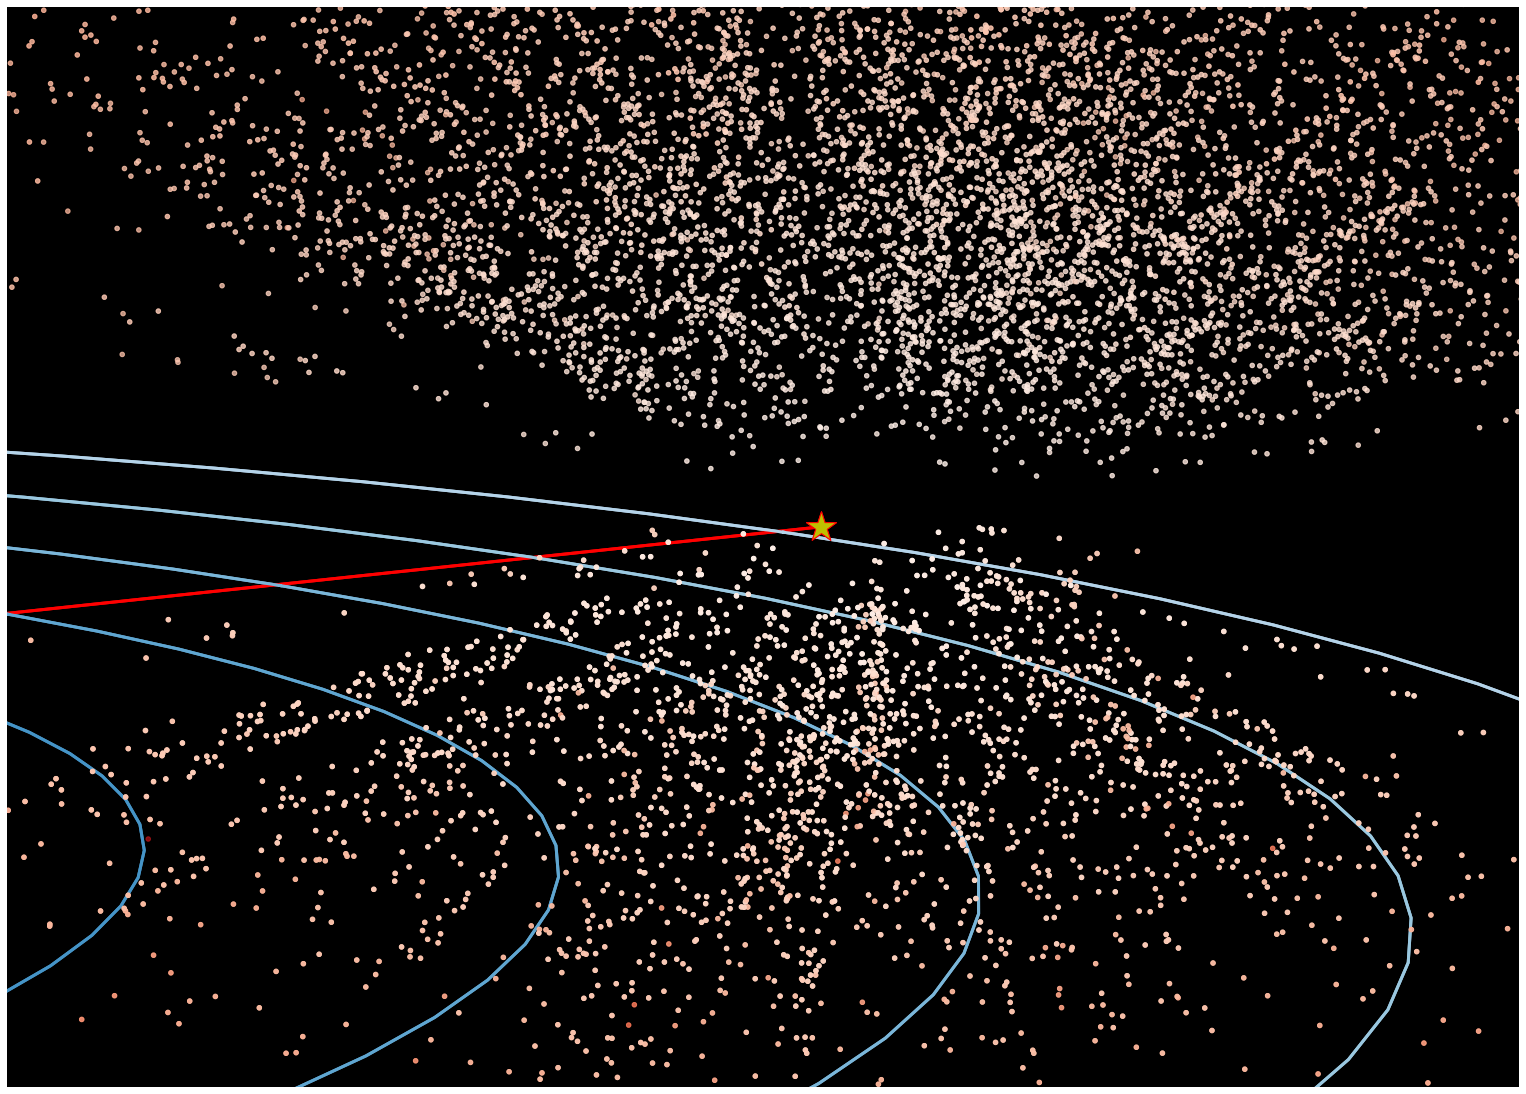

In [290]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import animation, rc
from IPython.display import HTML


n = 100
th = linspace(0,2*pi,n)
z0 = zeros(shape=n)
nr = 10
cols = flipud(cm.Blues(linspace(0,1,nr+4)))
rs = linspace(1.0,8.0,nr)

xlim=5.0
ylim=5.0
zlim=5.0

nstars = 10000
xs = df.GalRecX[0:nstars]
ys = df.GalRecY[0:nstars]
zs = df.GalRecZ[0:nstars]
fehs = df.feh[0:nstars]
dists = df.helio_dist[0:nstars]
    
ax.set_proj_type('ortho')

cmap = cm.Reds



fig = plt.figure(figsize=(21,15))
ax = fig.gca(projection='3d')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

line, = ax.plot([], [], lw=2)

nstars = 10000
xs = df.GalRecX[0:nstars]
ys = df.GalRecY[0:nstars]
zs = df.GalRecZ[0:nstars]

rs = linspace(1.0,8.0,nr)


# initialization function: plot the background of each frame
def init(): 
    points = ax.scatter(0, 0, 0, c='k', marker='o')
    ax.scatter(xs[zs<0], ys[zs<0], zs[zs<0], c=abs(dists[zs<0]), marker='o',cmap=cmap,vmin=12.0)
    ax.scatter(0,0,0, c='b', marker='o',s=500,edgecolors='lightblue')
    ax.plot([0,Sun[0]],[0,Sun[1]],[0,Sun[2]],'r-',lw=3)
    
    for j in range(1,nr):
        ax.plot(rs[j]*cos(th),rs[j]*sin(th),z0,'-',color=cols[j,:],lw=3)
    ax.scatter(xs[zs>0], ys[zs>0], zs[zs>0], c=abs(dists[zs>0]), marker='o',cmap=cmap,vmin=12.0)
    ax.scatter(Sun[0],Sun[1],Sun[2],c='y',marker='*',s=1000,edgecolors='r')
    ax.set_facecolor('k')

    plt.axis('off')
    return (points,)


sp = 100.0

# animation function. This is called sequentially
def animate(i):
    line.set_data(0,0)
    ax.view_init(elev=10., azim=30+i/2.0)
    lim = (xlim-i/sp)
    ax.set_xlim([8-lim,8+lim])
    ax.set_ylim([-lim,lim])
    ax.set_zlim([-lim,lim])
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('../movies/SDSS-Gaia-Halo.mp4', writer=writer)
